<h4 style="text-align:center">NNDL-LAB3</h4>

<p>Name: Kushal Sourav </p>
<p>Regno: 2347125 </p>

<h4> Data Preprocessing</h4>

In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0


y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

datagen.fit(x_train)


train_data, test_data = (x_train, y_train), (x_test, y_test)


<h4> Network Architecture Design , Activation Functions </h4>

In [7]:
from tensorflow.keras.layers import Activation

model = Sequential()

model.add(Flatten(input_shape=(32, 32, 3)))

model.add(Dense(512))
model.add(Activation('relu'))

model.add(Dense(256))
model.add(Activation('tanh'))

model.add(Dense(10, activation='softmax'))
model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,707,274 (6.51 MB)

 Trainable params: 1,707,274 (6.51 MB)

 Non-trainable params: 0 (0.00 B)

### Justification:

Input Layer:

* <p>Flatten the 32x32x3 image to a 1D vector (3072) so it can be processed by fully connected layers.

Hidden Layer 1 (512 Neurons, ReLU):
* <p>512 neurons to capture complex features.
* <p>ReLU activation to avoid vanishing gradients and speed up learning.


Hidden Layer 2 (256 Neurons, tanh):
* <p>256 neurons to reduce complexity and focus on finer details.
* <p>tanh activation for smoother gradient flow and centered outputs (-1 to 1).

Output Layer (10 Neurons, Softmax):
* <p>10 neurons for each CIFAR-10 class.
* <p>Softmax activation to output class probabilities for multi-class classification.

### Role of Activation Functions in Backpropagation:
* <p>Activation functions introduce non-linearity into the network, allowing it to learn from complex patterns in the data.
* <p>In backpropagation, gradients are computed from the loss and propagated backward through the layers. ReLU allows gradients to flow when the input is positive, while tanh provides smoother gradient changes.
* <p>If the activation function saturates , gradients can become very small (vanishing gradient problem), hindering learning. ReLU addresses this by providing gradients that don’t vanish for positive inputs

### 4. Loss Function and Optimizer:

<h4>Categorical Cross-Entropy:

* <small>This is the standard loss function for multi-class classification tasks.</small>
* <small>It compares the predicted probability distribution with the true distribution (one-hot encoded labels).</small>

<h4>Mean Squared Error (MSE):

* <small>Usually used for regression tasks, but we will compare it here for classification.</small>
* <small>MSE is the average squared difference between the predicted and true values. </small>

<h4> Hinge Loss:

* <small>Used for "maximum-margin" classification, primarily in Support Vector Machines (SVMs).</small>
* <small>Hinge loss focuses on maximizing the margin between predicted and true classes.</small>

In [8]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

model.compile(optimizer='adam', loss='hinge', metrics=['accuracy'])


### Optimizer: Adam
* <small>Adam (Adaptive Moment Estimation) is a popular choice because it adjusts the learning rate for each parameter dynamically based on the first and second moments of gradients.</small>
* <small>It combines the advantages of both SGD and RMSProp, making it robust and efficient for many problems.</small>
### Learning Rate:

* <span>The learning rate controls how large the steps taken during optimization are.
* If the learning rate is too high, the network may not converge, bouncing around the minima.
* If the learning rate is too low, training can be too slow and may get stuck in local minima.</small>


<b>Code for Adam Optimizer with Learning Rate:</b>

In [9]:
from tensorflow.keras.optimizers import Adam

adam_optimizer = Adam(learning_rate=0.001)

modelCompiled = model.compile(optimizer=adam_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

<h5>How does the choice of optimizer and learning rate influence the
convergence of the network? How would you adjust the learning rate if the
model is not converging properly? </h5>

* <b>Optimizer:</b> Adam automatically adjusts the learning rate during training, speeding up convergence by reducing oscillations. SGD might take longer without momentum.</small>
* <b>Learning Rate:</b> If the learning rate is too high, the model might overshoot the optimal solution; if too low, it converges slowly.


<h5>Adjusting Learning Rate if Model Doesn’t Converge:

* <small>start with a larger learning rate and reduce it if the model struggles to converge.
* Use a learning rate scheduler to decrease the rate during training if the loss plateaus.</small>


<h4>5: Training the Model</h4>

<p>we train the model using backpropagation, which involves the following:</p>

* <small>Computing the loss by comparing predictions with the actual labels.
* Calculating gradients of the loss with respect to the model weights using backpropagation.
* Updating the weights in the direction of reducing the loss, scaled by the learning rate.

In [10]:
from tensorflow.keras.callbacks import LearningRateScheduler


def lr_schedule(epoch):
    initial_lr = 0.001
    drop = 0.5
    epochs_drop = 10
    lr = initial_lr * (drop ** (epoch // epochs_drop))
    return lr

lr_scheduler = LearningRateScheduler(lr_schedule)

history = model.fit(datagen.flow(x_train, y_train, batch_size=64),
                    epochs=50,
                    validation_data=(x_test, y_test),
                    callbacks=[lr_scheduler],
                    verbose=1)


Epoch 1/50


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 49s 60ms/step - accuracy: 0.2206 - loss: 2.1385 - val_accuracy: 0.3482 - val_loss: 1.8089 - learning_rate: 0.0010
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - accuracy: 0.3267 - loss: 1.8553 - val_accuracy: 0.3876 - val_loss: 1.7067 - learning_rate: 0.0010
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - accuracy: 0.3694 - loss: 1.7454 - val_accuracy: 0.4262 - val_loss: 1.6131 - learning_rate: 0.0010
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 54ms/step - accuracy: 0.3948 - loss: 1.6743 - val_accuracy: 0.4372 - val_loss: 1.5643 - learning_rate: 0.0010
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 43s 55ms/step - accuracy: 0.4127 - loss: 1.6358 - val_accuracy: 0.4406 - val_loss: 1.5519 - learning_rate: 0.0010
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 45s 57ms/step - accuracy: 0.4256 - loss: 1.6016 - val_accuracy: 0.4660 - val_loss: 1.4938 - learning_rate: 0.0010
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 43s 54ms/step - accuracy: 0.4286 - loss: 1.5879

<h4>How Backpropagation Updates Weights:</h4>


* <small><b>Forward Pass:</b> The model makes a prediction using the current weights.
* <b>Loss Calculation:</b> The loss function calculates the error between predictions and actual labels.
* <b>Gradient Calculation:</b> Gradients of the loss are computed w.r.t. each weight using backpropagation.
* <b>Weight Update:</b> The optimizer updates weights in the opposite direction of the gradient, scaled by the learning rate.</small>

<h4>Role of Learning Rate in Backpropagation: </h4>
<p><small>The learning rate determines the step size during weight updates. A higher learning rate results in larger updates and faster training but risks overshooting minima, while a lower rate ensures stable convergence but can slow down training.</small></p>

#### 6. Model Evaluation

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy: 0.5452
Precision: 0.5452
Recall: 0.5452
F1-Score: 0.5452


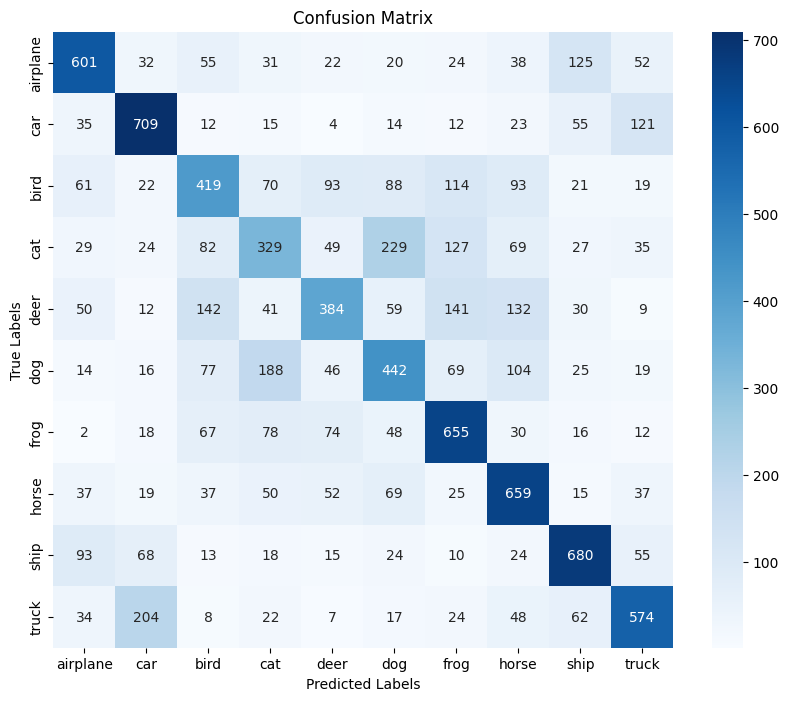

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

class_names = ['airplane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

y_pred = model.predict(x_test) 
y_pred_classes = np.argmax(y_pred, axis=1)  
y_true = np.argmax(y_test, axis=1)  

accuracy = accuracy_score(y_true, y_pred_classes)
print(f'Accuracy: {accuracy:.4f}')

precision = precision_score(y_true, y_pred_classes, average='micro')
recall = recall_score(y_true, y_pred_classes, average='micro')
f1 = f1_score(y_true, y_pred_classes, average='micro')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')

conf_matrix = confusion_matrix(y_true, y_pred_classes)


plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.title('Confusion Matrix')
plt.show()


<h5>Explanation of the Metrics:</h5>

* <b>Accuracy:</b> The proportion of correct predictions out of the total predictions.
* <b>Precision:</b> The proportion of true positive predictions out of all positive predictions. It measures how precise the model is when it predicts a certain class.
* <b>Recall:</b> The proportion of true positives out of all actual positive instances. It indicates how well the model captures all relevant instances.
* <b>F1-Score:</b> The harmonic mean of precision and recall, which balances both metrics.
* <b>Confusion Matrix:</b> A matrix showing actual vs. predicted class labels, providing insights into where the model is misclassifying.

#### How can you further improve model performance if the accuracy is low?

* <b>Data Augmentation:</b> Use random flips, rotations, and shifts with ImageDataGenerator to increase data diversity.
* <b>Model Architecture:</b> Add more layers or neurons, or switch to CNNs for better handling of image data.
* <b>Regularization:</b> Apply Dropout layers and L2 regularization to reduce overfitting.
* <b>Learning Rate Tuning:</b> Adjust the learning rate, possibly lower it, for better convergence.
* <b>Early Stopping:</b> Stop training when validation loss stops improving to avoid overfitting.
* <b>Ensemble Methods:</b> Combine predictions from multiple models to boost accuracy

<h4>7. Optimization Strategies: </h4>

* <b>Early Stopping:</b> Halt training when validation performance deteriorates to prevent overfitting.
* <b>Learning Rate Scheduling:</b> Adjust the learning rate during training for smoother convergence and to escape local minima.
* <b>Weight Initialization:</b> Start with small random weights to prevent saturation of activation functions and improve convergence speed.


<h5>Why is weight initialization important, and how does it impact the
convergence of your network?</h5>

* Proper weight initialization helps avoid issues like vanishing/exploding gradients, leading to faster and more stable convergence of the network.